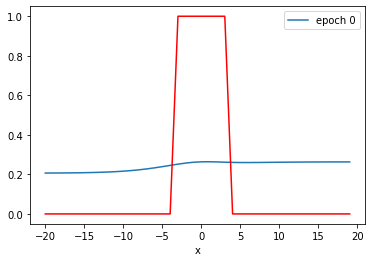

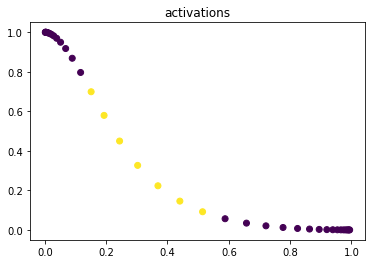

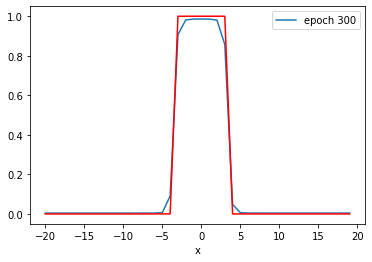

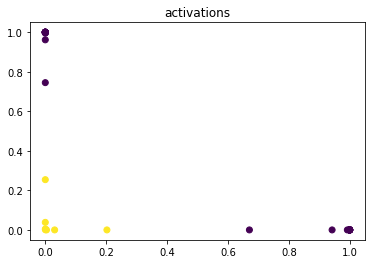

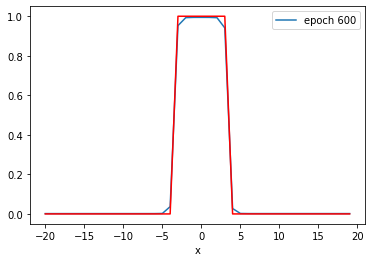

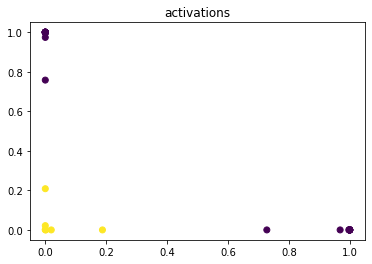

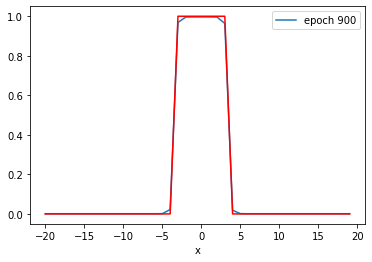

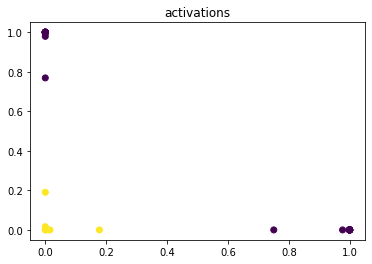

Text(0.5, 1.0, 'cross entropy loss')

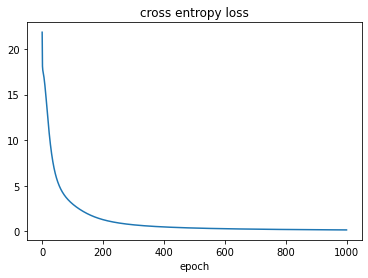

In [9]:

import torch 
from torch import nn, optim
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)


def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass


class Net(nn.Module):
  def __init__(self,input_,neurons,output_):
    super(Net,self).__init__()
    self.linear1 = nn.Linear(input_,neurons)
    self.linear2 = nn.Linear(neurons,output_)
    self.a1 = None
    self.l1 = None

  def forward(self,x):
    self.l1 = self.linear1(x)
    self.a1 = torch.sigmoid(self.l1)
    yhat = torch.sigmoid(self.linear2(self.a1))
    return yhat

model = Net(1,2,1)

def train(X,Y,criterion,optimizer,my_model,epochs=1000):
  error=[]
  total = 0
  for epoch in range(epochs):
    total=0
    for x,y in zip(X,Y):
      yhat = my_model(x)
      loss = criterion(yhat,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      total+=loss.item()

    error.append(total)
    if epoch % 300 == 0:    
      PlotStuff(X, Y, model, epoch, leg=True)
      plt.show()
      model(X)
      plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
      plt.title('activations')
      plt.show()

  return error

X = torch.arange(-20,20,1).view(-1,1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:,0] > -4) & (X[:,0] < 4)] = 1.0


def criterion_cross(yhat,y):
  return -1 * torch.mean((y * torch.log(yhat))+ ((1-y)*torch.log(1-yhat)))

optimizer = optim.SGD(model.parameters(),lr=0.1)
loss = train(X,Y,criterion_cross,optimizer,model)


#plot the loss
plt.plot(loss)
plt.xlabel('epoch')
plt.title('cross entropy loss')